# Exercise 1.2:  Queue Theory (Part 2)

---

<br>

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>
 
---

In [ ]:
#@title
# Import libraries
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')

from ModSimPy_Functions.modsim import *
import pandas as pd
import numpy as np

Downloaded ModSimPy_Functions/modsim.py


We're going to develop our Queue Theory code here.  I've written out code for a change function, and run_simulation function from part 1 here, and included a cell to test these functions. Notice two things: that 
* both `change_func` and `run_simulation` have a parameter `state`, and that we've called our state object `line` to make it clear that it is different from the local `state` that is inside the functions.
* `run_simulation` *returns* the Series `results`, which will allow us to access those results outside that function.

<br>

If you'd like to use the code you developed in part 1 here, feel free to replace these.  

In [ ]:
# Define change function
def change_func(state, lam, mu):
    # Check to see if there are any customers in line
    if state.cust > 0:
        # If there are customers in line, check to see if one leaves
        if flip(mu):
            state.cust -= 1
            
    # The addition of new custormers happens second.
    # This assumes that a newly arrived customer can not be served in 
    # the minute that s/he arrives.
    if flip(lam):
        state.cust += 1
    return state

In [ ]:
def run_simulation(state,lam,mu,num_steps):
    """Simulate a queueing system.
    """

    results = pd.Series([],dtype=object)
    results[0] = state.cust
    
    for t in range(num_steps):
        state = change_func(state,lam,mu)
        results[t+1] = state.cust
        
    results.plot(label='customers in line',color='C3',
             title='Customers in line',xlabel='time',
             ylabel='Number of customers');
    return results

0     0
1     0
2     0
3     0
4     1
     ..
56    2
57    1
58    1
59    0
60    1
Length: 61, dtype: int64

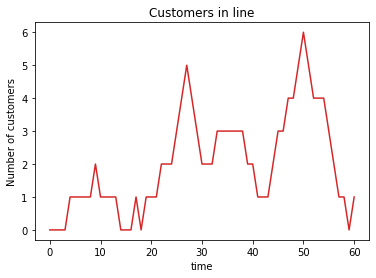

In [ ]:
line = pd.Series(dict(cust=0),name='Customers in line')
run_simulation(line,0.5,0.5,60)

### Part 5: Interpretation: Defining Metrics

Choosing a metric depends on our needs.  If we are most worried about alienating customers who see a long line, we might use `results.max()` as our metric.  If we want to reduce the time that customers spend in line, then `results.mean()` might be more useful.  

<br>

In this case, let's compute multiple metrics.  After we have run the simulation, we can compute `L`, which is the average number of customers in line, as well as `M`, the maximum numbers of customers. Using queueing theory, we can also define `W`, which is the average time customers spend in line.  `L` and `W` are related by Little's Law:

$$L = \lambda W$$

Where $\lambda$ is the arrival rate.  

<br>  

Now we want to calculate these values by including a function `compute_metrics` that will be called at the end of `run_simulation`.  Write that function here, and make it calculate, print out, and return `L`, `M`, and `W`.  To return multiple variables, simply separate them by a comma, like `return L, M, W`:

In [ ]:
# Write definition of compute_metrics
def compute_metrics(results, lam):



Now let's use our function. In the cell below:
* Create a new state object 
* Call `run_simulation`, but use the return value: assign it to a variable called `global_results`.  Python will automatically make the new variable a Series, because that's the type of the object that you assigned to it.
* Run `compute_metrics`, and "return" its values to a variable called `metrics`
* Output the values of `metrics` by typing that out on the last line of the cell.  Check the type of `metric` in your variable inspector (the `{x}` on the left side of the screen).

(2.4545454545454546, 12, 4.909090909090909)

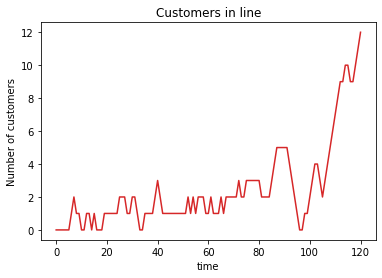

In [ ]:
# Call compute_metrics
lam = 0.5
line = pd.Series(dict(cust=0),name='Customers in line')
global_results = run_simulation(line, lam, 0.5, 120)
metrics = compute_metrics(global_results,lam)
metrics

Now we've got a simulation that runs and produces some manageable and useful metrics.  But if we run it multiple times, you can see that our results vary widely.

<br>

So let's create a function `mult_runs` that runs the simulation multiple times (`num_sims`) and finds the average of `L` for the multiple simulations.  Use the cell we just finished as your model, and create a Series called `mean_values` to save the `L` for each simulation:

In [ ]:
def mult_runs(lam,mu,num_sims,num_steps):
 
    

Now run `mult_runs` with `num_runs = 25`, and output the average for `L` for all of the simulations.  

In [ ]:
mean = mult_runs(0.5,0.5,25, 120)
mean.mean()

How much does `L` vary when you run `mult_runs` multiple times with the same parameters? 

<br>

Ok, now we have a pretty good way of testing the effectiveness of a single checker!  Now we can compare more complex systems.

<br>

---

### Part 6 (One queue, two servers)

Now let's test the other two queueing strategies:

1.  One queue with two checkout counters.
2.  Two queues, one for each counter.

<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/queues2.PNG width = 600>


Start with option 1 (on the left in the image).  Ideally, we would have our code up so that we only need to change the `change_func`.  Are we that we clever?

<br>

Let's see.  First, write the change function below.  As you do, think physically about the system: does the arrival rate change?  Does the departure rate change?  How?

In [ ]:
# Define the new change function
def change_func_1q_2s(state,lam,mu):


Now ideally, we'd like to just run `mult_runs` with this new change function.  Aaargh!  We didn't code flexibly enough before.  If we want to just use `mult_runs`, it will need to take a change function as one of its arguments--and so will `run_simulation`.  Copy those functions in the cell below, and fix them:

In [ ]:
# Fix mult_runs and run_simulations

Ok, that wasn't too bad.   Now test the new change function with `run_simulation` and then `mult_runs`.  Before you do, consider what kinds of results you expect to see....

In [ ]:
lam = 0.5
mu = 0.5
num_sims = 25
num_steps =120


### Part 7 (Two queues, two servers)

To simulate the scenario with two separate queues, we need two state variables to keep track of customers in each queue.  Fortunately, our state object is a series, so we can accomodate this change without too much trouble.  Call the 2nd key-value pairing in the state object `cust2`.

<br>

Write the new change function below.  Again, think physically.  If a customer arrives, where will they go?


In [ ]:
# Create an change function for 2 queues
def change_func_2q_2s(state,lam,mu):


Will `run_simulation` and `mult_runs` work with this change function?  Look back and see.  Make the changes that are needed.  If the old change functions won't work with these new functions, you'll want to give the new functions new names to avoid confusion.  But if you can avoid that, it would be better!

In [ ]:
# Define new run_simulation and mult_runs


Now test your functions:

In [ ]:
mean = mult_runs(lam, mu, 25, 120,change_func_2q_2s)
mean.mean()

✅  In a text cell, comment on the performance of the three different arrangements we've tested here.  Run each of the simulations multiple times.  Does one approach result in lower numbers of customers in line?  How much is the difference?  If the store was currently set up in the normal fashion (one line per checkout counter), would it be worth trouble/ expense to change to a single line system?